<a href="https://colab.research.google.com/github/charanj15076/BitPredict_Forecast/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing time series data with pandas
import pandas as pd
df = pd .read_csv("/content/BTC-USD.csv",
                  parse_dates=["Date"],
                  index_col = "Date") # parse the date coloumn and change index to datetime

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3411 entries, 2014-09-17 to 2024-01-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3411 non-null   float64
 1   High       3411 non-null   float64
 2   Low        3411 non-null   float64
 3   Close      3411 non-null   float64
 4   Adj Close  3411 non-null   float64
 5   Volume     3411 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 186.5 KB


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-14,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522
2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,43154.945313,24062872740
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,20851232595
2024-01-18,42742.312500,42864.671875,42344.417969,42449.023438,42449.023438,18403373056


In [4]:
len(df) # no of samples we have

3411

In [5]:
# we are gonna we closing price of bitcoin to predict the actual price
bit_coin_prices = pd.DataFrame(df["Close"]).rename(columns = {"Close" : "Price"})
bit_coin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


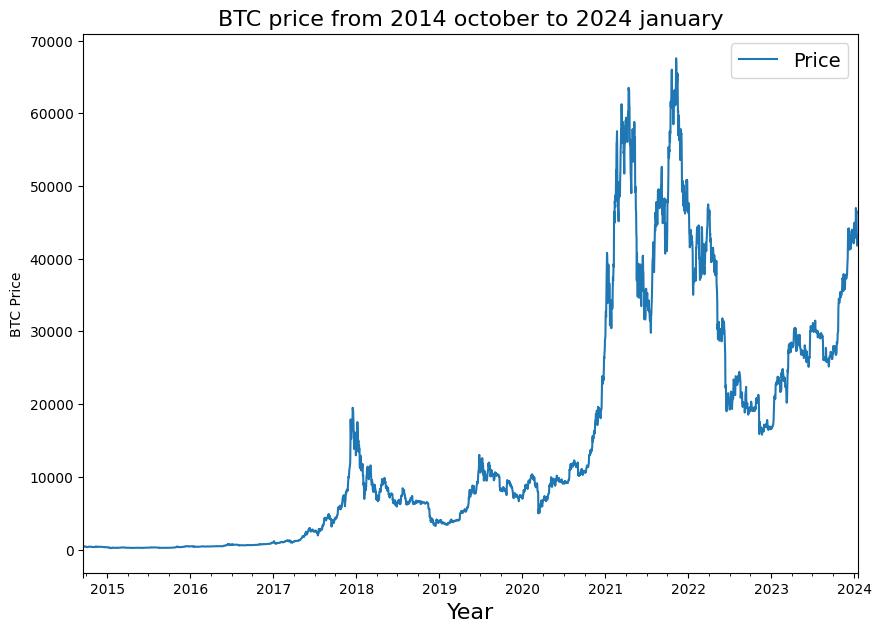

In [6]:
import matplotlib.pyplot as plt
bit_coin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("Year", fontsize = 16)
plt.title("BTC price from 2014 october to 2024 january", fontsize = 16)
plt.legend(fontsize = 14)

In [7]:
# create train and test splits  the right way for time series data
split_size = int(0.8 * len(bit_coin_prices))

x_train, y_train = bit_coin_prices.index.to_numpy()[:split_size], bit_coin_prices.Price[:split_size]

x_test, y_test = bit_coin_prices.index.to_numpy()[split_size : ], bit_coin_prices.Price[split_size :]

len(x_train), len(x_test) , len(y_train) , len(y_test)

(2728, 683, 2728, 683)

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

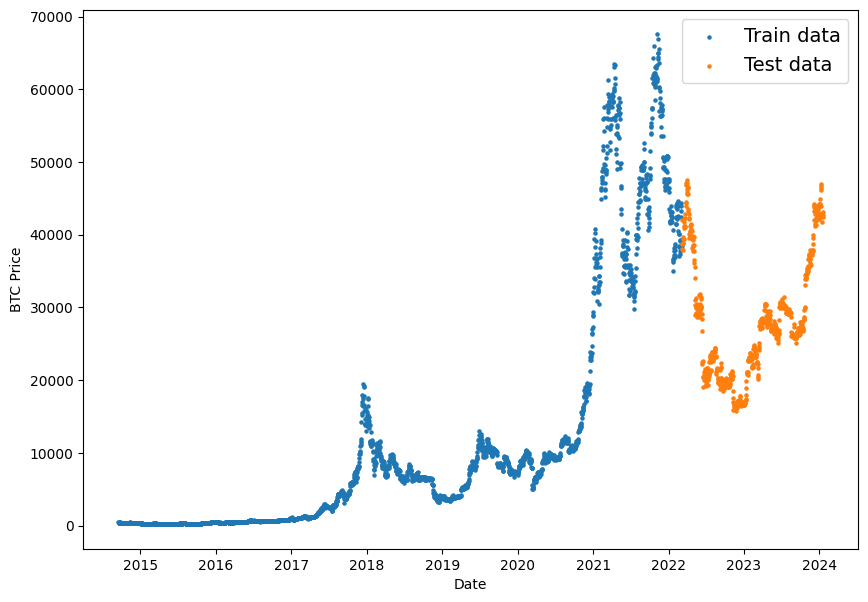

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [10]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

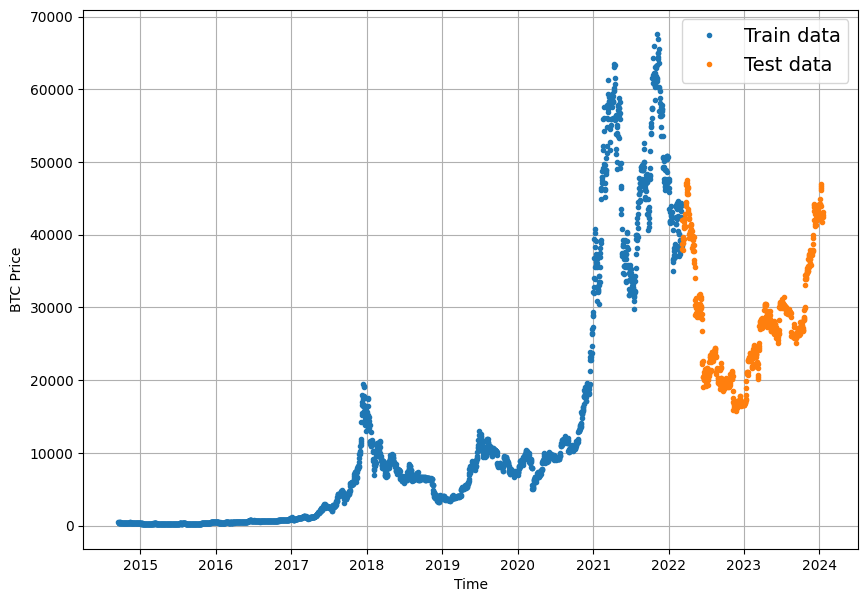

In [11]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

In [12]:
# model 0 : Naive forecast model(baseline)
# the prediction of future timestep is equal to the value in present time step this is for
# horizon of 1

naive_forecast  = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(Date
 2022-03-07    38062.039063
 2022-03-08    38737.269531
 2022-03-09    41982.925781
 2022-03-10    39437.460938
 2022-03-11    38794.972656
 2022-03-12    38904.011719
 2022-03-13    37849.664063
 2022-03-14    39666.753906
 2022-03-15    39338.785156
 2022-03-16    41143.929688
 Name: Price, dtype: float64,
 Date
 2024-01-08    46970.503906
 2024-01-09    46139.730469
 2024-01-10    46627.777344
 2024-01-11    46368.585938
 2024-01-12    42853.167969
 2024-01-13    42842.382813
 2024-01-14    41796.269531
 2024-01-15    42511.968750
 2024-01-16    43154.945313
 2024-01-17    42742.652344
 Name: Price, dtype: float64)

In [13]:
y_test[-10:]

Date
2024-01-09    46139.730469
2024-01-10    46627.777344
2024-01-11    46368.585938
2024-01-12    42853.167969
2024-01-13    42842.382813
2024-01-14    41796.269531
2024-01-15    42511.968750
2024-01-16    43154.945313
2024-01-17    42742.652344
2024-01-18    42449.023438
Name: Price, dtype: float64

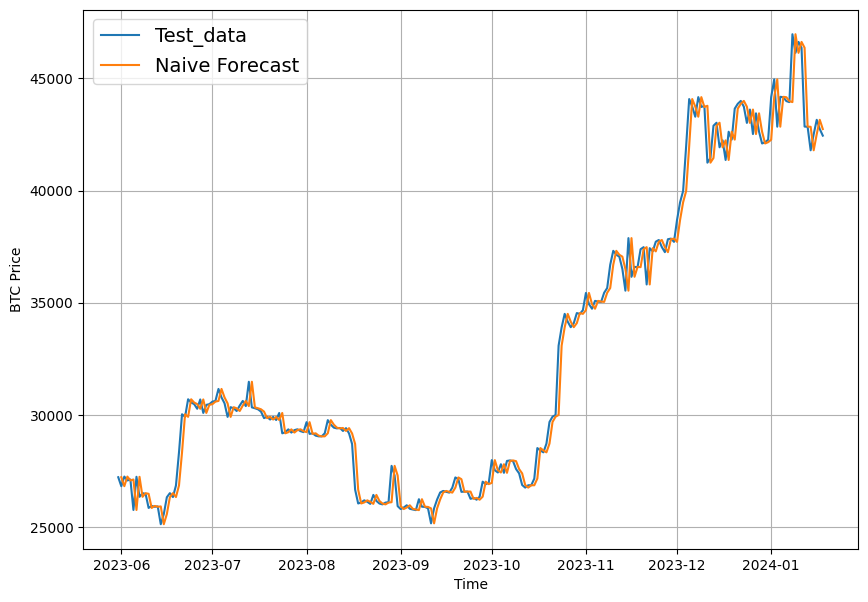

In [14]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps = x_train, values = y_train,label = "Train_data")
plot_time_series(timesteps = x_test, values = y_test,start = 450 ,format = "-",label = "Test_data")
plot_time_series(timesteps= x_test[1:], values = naive_forecast,start = 450, format = "-" , label = "Naive Forecast")

In [15]:
#evaluating a time series model
# as we are predicting continuous value we have to use regression-like metrics
# MAE - mean absolute error
# MSE - mean squared error
# MAPE = mean absolute percentage error
# MASE = mean absolute scaled error

import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season


In [16]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred= naive_forecast).numpy()

nan

In [17]:

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0 :
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [18]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 514.0609,
 'mse': 625257.6,
 'rmse': 790.7323,
 'mape': 1.848709,
 'mase': 1.0004606}

In [19]:
# windowing our data example
print(f"we want to use this :{btc_price[:7]} \nto predict this :{btc_price[8]}")

we want to use this :[457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] 
to predict this :411.574005


In [20]:
HORIZON = 1 # output  -> predict  next 1 dat
WINDOW_SIZE = 7 # input -> use past 1 week data as input


In [21]:
# function to create windowed_data with label
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [22]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels



In [23]:
prices = bit_coin_prices["Price"].to_numpy()

In [24]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3404, 3404)

In [25]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")


Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [26]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [27]:
train_windows, test_windows, train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2723, 681, 2723, 681)

In [28]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [29]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [30]:
# we want to compare each of our models best performances against other models best performances
#make a modeling checkpoint callback
import os

def create_modeling_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbode = 0,
                                            save_best_only = True)

In [31]:
# Model 1: Dense model window = 7 and horizon =1
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON , activation = "linear")
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs =100,
            verbose = 1,
            batch_size =128,
            validation_data = (test_windows,test_labels),
            callbacks = create_modeling_checkpoint(model_name = model_1.name))



Epoch 1/100
22/22 [==============================] - 3s 56ms/step - loss: 11478.8945 - mae: 11478.8945 - mse: 441584832.0000 - val_loss: 7950.7710 - val_mae: 7950.7710 - val_mse: 70571432.0000
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 1477.3165 - mae: 1477.3165 - mse: 9303265.0000 - val_loss: 1989.6971 - val_mae: 1989.6971 - val_mse: 5662725.0000
Epoch 3/100
22/22 [==============================] - 1s 27ms/step - loss: 870.1519 - mae: 870.1519 - mse: 3496347.7500 - val_loss: 1097.2208 - val_mae: 1097.2208 - val_mse: 2472185.2500
Epoch 4/100
22/22 [==============================] - 1s 27ms/step - loss: 701.5410 - mae: 701.5410 - mse: 2308518.7500 - val_loss: 1045.9698 - val_mae: 1045.9698 - val_mse: 2310463.5000
Epoch 5/100
22/22 [==============================] - 1s 26ms/step - loss: 663.8020 - mae: 663.8020 - mse: 2090332.3750 - val_loss: 999.9511 - val_mae: 999.9511 - val_mse: 2151715.7500
Epoch 6/100
22/22 [==============================] - 0s 6ms/ste

In [32]:
model_1.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 6ms/step - loss: 546.6977 - mae: 546.6977 - mse: 661842.8750


[546.6976928710938, 546.6976928710938, 661842.875]

In [33]:
# load in the saved best model and evaluate again
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 518.7900 - mae: 518.7900 - mse: 631701.8750


[518.7900390625, 518.7900390625, 631701.875]

In [34]:
def make_preds(model, input_data):
  """
  making predictions with the model
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [35]:
model_1_preds = make_preds(model_1,test_windows)

22/22 [==============================] - 0s 3ms/step


In [36]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),y_pred = model_1_preds)
model_1_results

{'mae': 518.79004,
 'mse': 631701.9,
 'rmse': 794.79675,
 'mape': 1.8755648,
 'mase': 1.0176208}

In [37]:
naive_results

{'mae': 514.0609,
 'mse': 625257.6,
 'rmse': 790.7323,
 'mape': 1.848709,
 'mase': 1.0004606}

In [38]:
# model 2 window size(30)  and horizon size(1)
HORIZON = 1
WINDOW_SIZE = 30

In [39]:
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_labels),len(full_windows)


(3381, 3381)

In [40]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [41]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_2.fit(train_windows,
            train_labels,
            validation_data = (test_windows,test_labels),
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            callbacks = create_modeling_checkpoint(model_name = model_2.name))

In [42]:
model_2.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 1010.7679 - mae: 1010.7679 - mse: 1513440.5000


[1010.7678833007812, 1010.7678833007812, 1513440.5]

In [43]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 544.2173 - mae: 544.2173 - mse: 661057.6875


[544.2173461914062, 544.2173461914062, 661057.6875]

In [44]:
model_2_preds = make_preds(model_2,test_windows)

22/22 [==============================] - 0s 2ms/step


In [45]:
model_2_results = evaluate_preds(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 544.2174,
 'mse': 661057.7,
 'rmse': 813.05457,
 'mape': 1.9786874,
 'mase': 1.0747074}

In [46]:
# model 3 window size(30)  and horizon size(7)
HORIZON = 7
WINDOW_SIZE = 30

In [47]:
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_labels),len(full_windows)

(3375, 3375)

In [48]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [49]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_3_dense")

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_3.fit(train_windows,
            train_labels,
            validation_data = (test_windows,test_labels),
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            callbacks = create_modeling_checkpoint(model_name = model_3.name))

In [50]:
model_3.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 1296.3761 - mae: 1296.3761 - mse: 3267607.2500


[1296.3760986328125, 1296.3760986328125, 3267607.25]

In [51]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 1110.2690 - mae: 1110.2690 - mse: 2836702.2500


[1110.26904296875, 1110.26904296875, 2836702.25]

In [52]:
model_3_preds = make_preds(model_3,test_windows)

22/22 [==============================] - 0s 2ms/step


In [53]:
model_3_results = evaluate_preds(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mae': 1110.2692,
 'mse': 2836701.8,
 'rmse': 1280.352,
 'mape': 4.099087,
 'mase': 2.1917465}

In [54]:
# model 4 conv1d
HORIZON = 1
WINDOW_SIZE = 7

In [55]:
full_windows, full_labels = make_windows(prices , window_size=WINDOW_SIZE, horizon= HORIZON)


In [56]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows)

(2723, 681)

In [57]:
# to use conv1d we need a input shape of :(batch_size, timesteps, input_dim)
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [58]:
expand_dim_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [59]:
print(f"Original shape : {x.shape}")
print(f"Expanded shape : {expand_dim_layer(x).shape}")

Original shape : (7,)
Expanded shape : (7, 1)


In [60]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, padding = "causal", activation = 'relu'),
    layers.Dense(HORIZON)

],name = "model_4_Conv1d")



model_4.compile(loss ="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_4.fit(train_windows,
            train_labels,
            validation_data = (test_windows, test_labels),
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            callbacks = create_modeling_checkpoint(model_name=model_4.name))

In [61]:
model_4.summary()

Model: "model_4_Conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 5ms/step - loss: 536.4853 - mae: 536.4853 - mse: 647279.9375


[536.4852905273438, 536.4852905273438, 647279.9375]

In [63]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1d")

In [64]:
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 516.4332 - mae: 516.4332 - mse: 627263.6875


[516.4331665039062, 516.4331665039062, 627263.6875]

In [65]:
model_4_preds = make_preds(model_4, test_windows)


22/22 [==============================] - 0s 2ms/step


In [66]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_4_preds)
model_4_results

{'mae': 516.4332,
 'mse': 627263.75,
 'rmse': 791.9998,
 'mape': 1.8666573,
 'mase': 1.0129979}

In [67]:
# model 5 lstm
inputs = layers.Input(shape=( WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences=True, activation = "relu")(x)
x = layers.LSTM(128,activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,output,name = "model_5_lstm")


model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            validation_data=(test_windows,test_labels),
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            callbacks = create_modeling_checkpoint(model_5.name))

Epoch 1/100
22/22 [==============================] - 5s 145ms/step - loss: 9075.5068 - val_loss: 14774.7988
Epoch 2/100
22/22 [==============================] - 2s 113ms/step - loss: 2989.8560 - val_loss: 1989.9956
Epoch 3/100
22/22 [==============================] - 2s 87ms/step - loss: 848.3906 - val_loss: 1318.7498
Epoch 4/100
22/22 [==============================] - 2s 85ms/step - loss: 644.7888 - val_loss: 924.8478
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 614.9122 - val_loss: 963.5858
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 605.9376 - val_loss: 959.6620
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - loss: 611.9837 - val_loss: 996.2079
Epoch 8/100
22/22 [==============================] - 2s 87ms/step - loss: 600.9874 - val_loss: 904.7227
Epoch 9/100
22/22 [==============================] - 0s 8ms/step - loss: 589.9585 - val_loss: 915.9954
Epoch 10/100
22/22 [==============================] - 0s 7ms

In [68]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows,test_labels)

22/22 [==============================] - 0s 3ms/step - loss: 541.1663


541.1663208007812

In [69]:
model_5_preds = make_preds(model_5,test_windows)

22/22 [==============================] - 0s 2ms/step


In [70]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_5_preds)
model_5_results

{'mae': 541.16626,
 'mse': 671883.44,
 'rmse': 819.68494,
 'mape': 1.9639674,
 'mase': 1.0615124}

In [71]:
# multivariate analysis
# bitoin halving

block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [72]:
from datetime import date
from functools import reduce


def numOfDays(date1, date2):
    return reduce(lambda x, y: (y-x).days, [date1, date2])


date1 = date(2018, 12, 13)
date2 = date(2019, 2, 25)
print(numOfDays(date1, date2), "days")

74 days


In [73]:
bit_coin_prices.index[0]

Timestamp('2014-09-17 00:00:00')

In [74]:

# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bit_coin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bit_coin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2063)

In [75]:
bit_coin_prices_block = bit_coin_prices.copy()
bit_coin_prices_block["block_reward"] = None

bit_coin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bit_coin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bit_coin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [76]:
bit_coin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


In [77]:
bit_coin_prices_block.tail()


,Price,block_reward
Date,,
2024-01-14,41796.269531,6.25
2024-01-15,42511.968750,6.25
2024-01-16,43154.945313,6.25
2024-01-17,42742.652344,6.25
2024-01-18,42449.023438,6.25


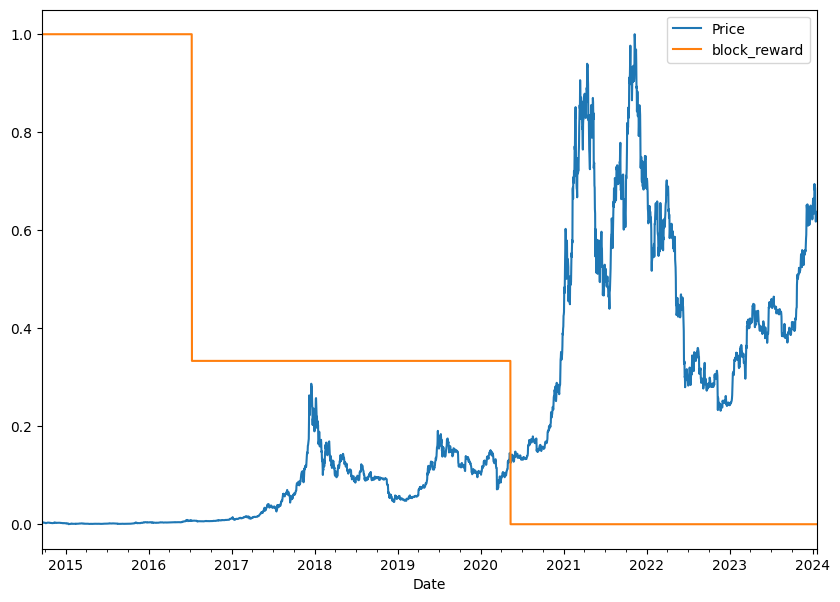

In [78]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bit_coin_prices_block[["Price","block_reward"]]),
                                     columns=bit_coin_prices_block.columns,
                                     index = bit_coin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));

In [79]:
bit_coin_prices_windowed = bit_coin_prices_block.copy()
# another way to window our dataset

for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bit_coin_prices_windowed[f"Price+{i+1}"] = bit_coin_prices_windowed["Price"].shift(periods=i+1)
bit_coin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [80]:
bit_coin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-01-14,41796.269531,6.25,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469,46970.503906,43943.097656
2024-01-15,42511.968750,6.25,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469,46970.503906
2024-01-16,43154.945313,6.25,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469
2024-01-17,42742.652344,6.25,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344
2024-01-18,42449.023438,6.25,42742.652344,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938


In [81]:
X = bit_coin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bit_coin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()


,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [82]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2723, 2723, 681, 681)

In [83]:
#model 6 Dense same as model 1
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    layers.Dense(128 , activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_multivariate")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_6.fit(X_train,
            y_train,
            validation_data = (X_test,y_test),
            epochs = 100,
            batch_size = 128,
            callbacks = create_modeling_checkpoint(model_name=model_6.name))

Epoch 1/100
22/22 [==============================] - 2s 36ms/step - loss: 1513.3707 - mae: 1513.3707 - mse: 10836598.0000 - val_loss: 2001.6144 - val_mae: 2001.6144 - val_mse: 5857824.5000
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 788.5393 - mae: 788.5393 - mse: 2852676.2500 - val_loss: 1152.2576 - val_mae: 1152.2576 - val_mse: 2688312.5000
Epoch 3/100
22/22 [==============================] - 1s 28ms/step - loss: 685.2153 - mae: 685.2153 - mse: 2229941.5000 - val_loss: 1051.4023 - val_mae: 1051.4023 - val_mse: 2325791.2500
Epoch 4/100
22/22 [==============================] - 1s 51ms/step - loss: 659.0524 - mae: 659.0524 - mse: 2053334.1250 - val_loss: 956.4066 - val_mae: 956.4066 - val_mse: 2056270.3750
Epoch 5/100
22/22 [==============================] - 1s 28ms/step - loss: 640.9408 - mae: 640.9408 - mse: 1947778.1250 - val_loss: 921.4364 - val_mae: 921.4364 - val_mse: 1908667.0000
Epoch 6/100
22/22 [==============================] - 1s 28ms/step - los

In [84]:
model_6.evaluate(X_test,y_test)


22/22 [==============================] - 0s 3ms/step - loss: 533.3542 - mae: 533.3542 - mse: 645832.1250


[533.354248046875, 533.354248046875, 645832.125]

In [85]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test,y_test)

22/22 [==============================] - 0s 3ms/step - loss: 513.1986 - mae: 513.1986 - mse: 625138.5000


[513.1986083984375, 513.1986083984375, 625138.5]

In [86]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38462.793, 41566.49 , 39814.574, 38806.227, 38941.754, 38014.44 ,
       39431.258, 39388.293, 40949.92 , 41067.87 ], dtype=float32)>

In [87]:
model_6_results = evaluate_preds(y_test,model_6_preds)
model_6_results

{'mae': 513.1986,
 'mse': 625138.5,
 'rmse': 790.657,
 'mape': 1.8517292,
 'mase': 1.0066531}

In [88]:
naive_results

{'mae': 514.0609,
 'mse': 625257.6,
 'rmse': 790.7323,
 'mape': 1.848709,
 'mase': 1.0004606}

In [89]:
#### N-BEATS Basic Block replication with Tensroflow layer subclassing(section 3.1 of N-BEATS paper)
### building and testing N-BEATS block layer
##create N-BEATS block custom layer

#because N-Beats block layer doesnt exist in tensorflow , we have to create it
# to create custom layers and models in tensorflow we have to use subclassing
class NBeatsBlock(tf.keras.layers.Layer): # this function is a tf.keras.layers.Layer subclass
  def __init__(self,
               input_size : int,
               horizon : int,
               theta_size : int,
               n_neurons : int,
               n_layers : int,
               **kwargs): # **kwargs argument takes care of all the arguments for the parent class like(input shape,trainable tc)
    super().__init__(**kwargs) # super method is standard when implementing python classes
    #initializing variables
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #block contains 4 fully connected layers each has its relu activation ##from paper
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]

    #output of the block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta_layer")

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    #output the forecast and backcast from theta
    backcast, forecast = theta[:,:self.input_size] , theta[:,-self.horizon:]
    return backcast, forecast



In [90]:
#testing N-Beats block layer
dummy = NBeatsBlock(input_size=WINDOW_SIZE,horizon=HORIZON,
                    theta_size = WINDOW_SIZE+HORIZON,
                    n_neurons = 128,
                    n_layers = 4)


In [91]:
#create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [92]:
back_cast,fore_cast = dummy(dummy_inputs)
print(f"back_cast : {tf.squeeze(back_cast.numpy())}")
print(f"fore_cast : {tf.squeeze(fore_cast.numpy())}")

back_cast : [ 0.1488939   0.00519731  0.30587244  0.0911094  -0.71112555 -0.00717352
 -0.15462701]
fore_cast : -0.10708986222743988


In [93]:
#performant pipeline using tf.data api
HORIZON = 1
WINDOW_SIZE = 7


In [94]:
bit_coin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [95]:
bit_coin_prices_nbeats = bit_coin_prices.copy()
for i in range(WINDOW_SIZE):
  bit_coin_prices_nbeats[f"Price+{i+1}"] = bit_coin_prices_nbeats["Price"].shift(periods = i+1)
bit_coin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [96]:
X = bit_coin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bit_coin_prices_nbeats.dropna()["Price"]

#make train_test splits
split_size = int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2723, 681, 2723, 681)

In [97]:
#making data performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test )

#combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [98]:
# seting hyper parameters from n-beats paper https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE


(7, 8)

In [99]:
#Residual Connections
%%time

#1. set up an instance of N-BEATS block layer using NBeatsBlock

tf.random.set_seed(42)

n_beats_block_layer = NBeatsBlock(input_size= INPUT_SIZE,
                                  theta_size= THETA_SIZE,
                                  n_layers= N_LAYERS,
                                  n_neurons= N_NEURONS,
                                  horizon= HORIZON,
                                  name = "InitialBlock") # because we setup **kwargs we can use name

#2 create inputs to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = "Stack_Input")

#3 initial backcast and forecast

residuals , forecast = n_beats_block_layer(stack_input)

#4 create stacks of block layers
#N_STACKS-1 because we aleady initialized layer 1 above so we are building the rest
for i ,_ in enumerate(range(N_STACKS-1)):
  #5 use the n beats block to calculate backcast and forecast
  back_cast, block_fore_cast = NBeatsBlock(input_size= INPUT_SIZE,
                                  theta_size= THETA_SIZE,
                                  n_layers= N_LAYERS,
                                  n_neurons= N_NEURONS,
                                  horizon= HORIZON,
                                  name = f"NBeatsBlock{i}")(residuals) # pass in the residuals

  #6 create the double residual stacking
  residuals = layers.subtract([residuals,back_cast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_fore_cast] , name = f"add_{i}")



#7 put Inputs and ouptuts to a model
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_NBEATS")

model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                )

# fit the model with early stopping and LRplateau
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                        patience = 200,
                                                        restore_best_weights =True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience = 100, verbose = 1)])



Epoch 659: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1068: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1168: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 48s, sys: 7.68 s, total: 5min 56s
Wall time: 6min 22s


In [100]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 29ms/step - loss: 511.0448


511.0448303222656

In [101]:
model_7_preds = make_preds(model_7, test_dataset)

1/1 [==============================] - 1s 1s/step


In [102]:
model_7_results = evaluate_preds(y_test,model_7_preds)
model_7_results

{'mae': 511.04483,
 'mse': 623095.94,
 'rmse': 789.36426,
 'mape': 1.8417284,
 'mase': 1.0024283}

In [103]:
naive_results

{'mae': 514.0609,
 'mse': 625257.6,
 'rmse': 790.7323,
 'mape': 1.848709,
 'mase': 1.0004606}

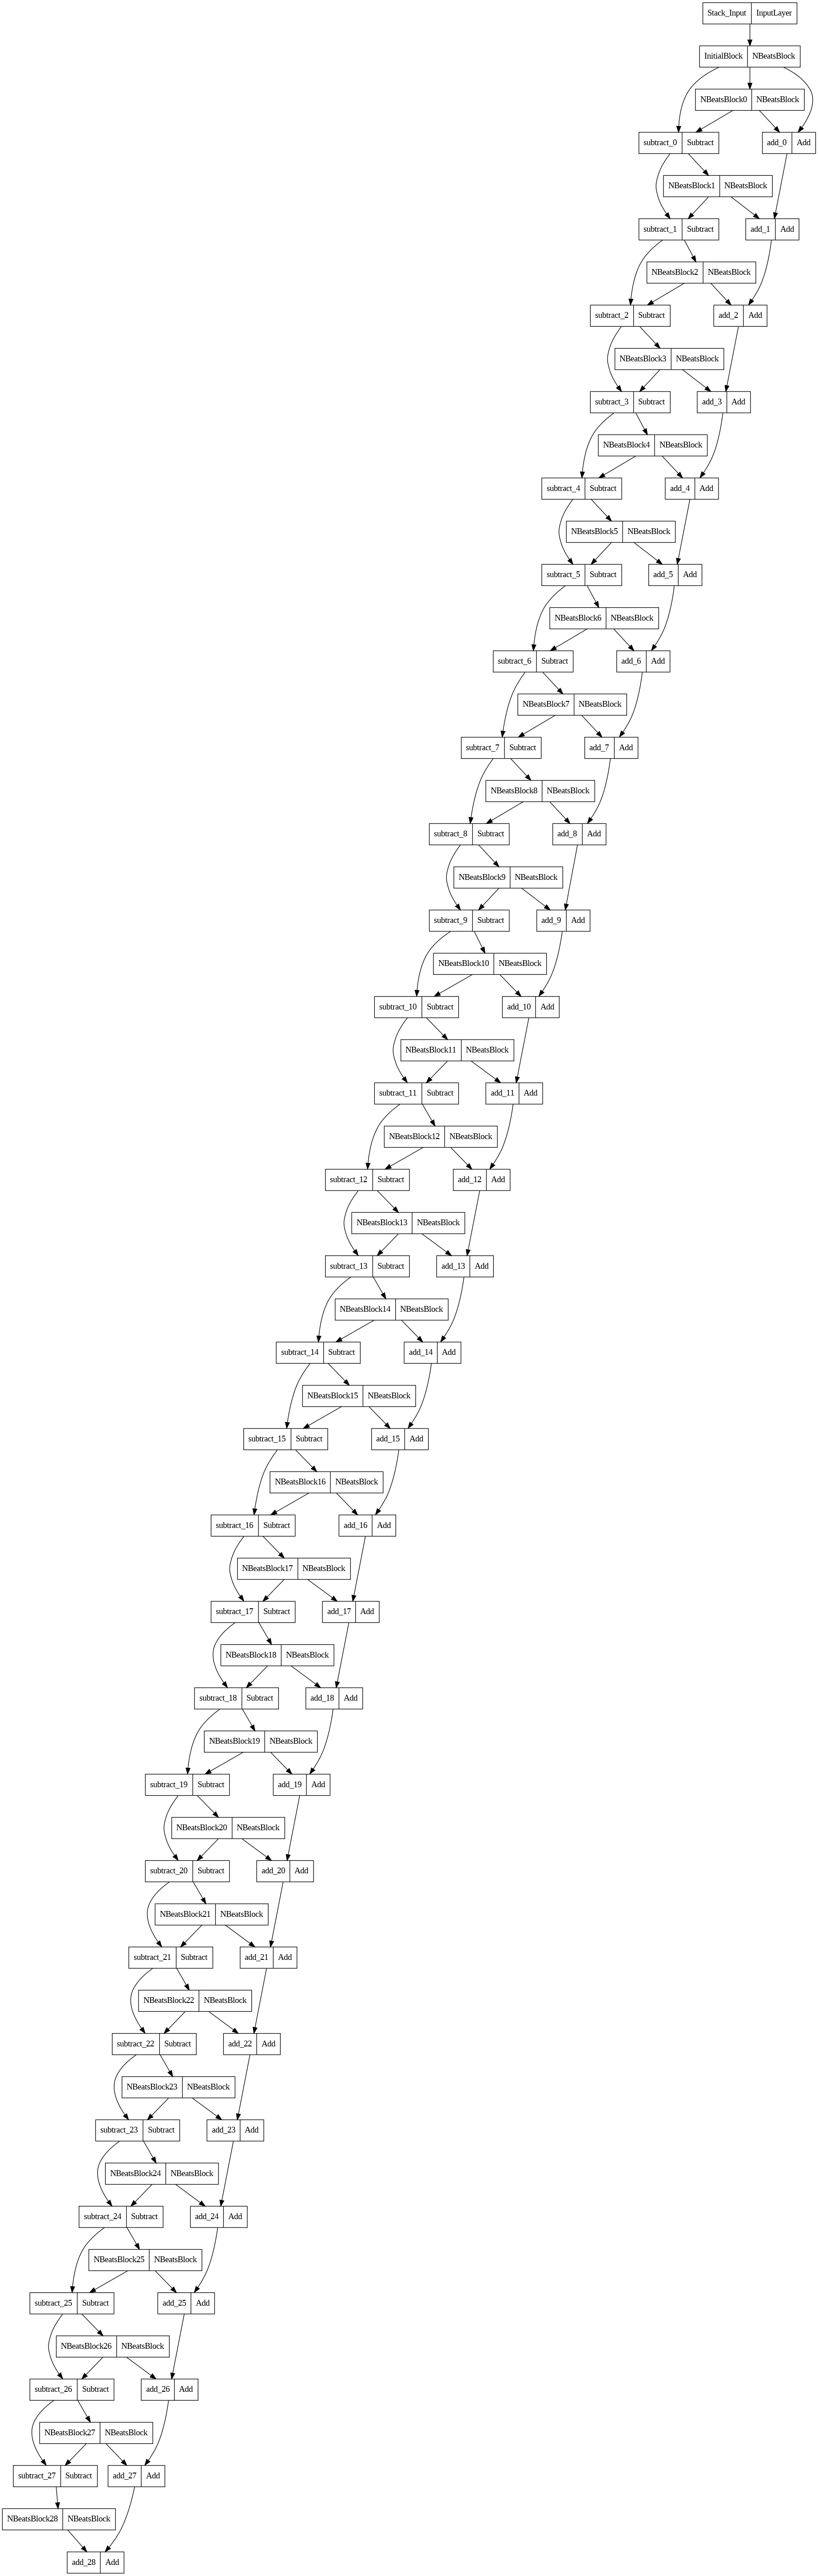

In [104]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [105]:
def get_ensemble(horizon = HORIZON,
                 train_data = train_dataset,
                 test_data = test_dataset,
                 num_iter = 10,
                 num_epochs = 100,
                 loss_func = ["mae","mse","mape"]):
  """returns a list of num_iter models each trained on mae, mse and mape
  """
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_func:
      print(f"optimizing model :{i} with loss_function : {loss_function} for {num_epochs} epochs.")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
          layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss = loss_func,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae","mse"])
      model.fit(train_data,
                validation_data = test_data,
                epochs = num_epochs,
                verbose = 0,
                callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1),
                             tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                              patience = 100,
                                                              restore_best_weights = True)])
      ensemble_models.append(model)

    return ensemble_models

In [106]:

%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble(num_iter=5,
                                      num_epochs=1000)

optimizing model :0 with loss_function : mae for 1000 epochs.

Epoch 737: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model :0 with loss_function : mse for 1000 epochs.

Epoch 351: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model :0 with loss_function : mape for 1000 epochs.

Epoch 525: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 1min 14s, sys: 4.46 s, total: 1min 19s
Wall time: 1min 25s


In [107]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [108]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 52ms/step


<tf.Tensor: shape=(3, 681), dtype=float32, numpy=
array([[38794.523, 40615.043, 40380.066, ..., 42227.336, 43106.2  ,
        42469.344],
       [36699.688, 41692.43 , 38565.18 , ..., 43238.06 , 40972.703,
        43151.266],
       [38247.26 , 40652.11 , 39892.457, ..., 41835.73 , 42560.49 ,
        42065.645]], dtype=float32)>

In [109]:

# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results


{'mae': 533.4873,
 'mse': 662111.5,
 'rmse': 813.70233,
 'mape': 1.9287016,
 'mase': 1.0464499}

In [110]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results


{'mae': 542.43896,
 'mse': 672271.8,
 'rmse': 819.9218,
 'mape': 1.954282,
 'mase': 1.0640087}

In [111]:
# to find the upper and lower bounds of the predictions

def get_upper_lower(preds):# take the predictions of a number of randomly initializer models
  #2. measure the standard deviation of the predictions
  std =  tf.math.reduce_std(preds, axis = 0)

  #3. multiply the std with 1.96(95%) prediciton interval
  interval = 1.96*std

  #4. get predictions upper and lower bands
  preds_mean = tf.reduce_mean(preds,axis = 0)
  lower,upper = preds_mean - interval, preds_mean+interval

  return lower,upper

In [112]:
lower,upper = get_upper_lower(ensemble_preds)

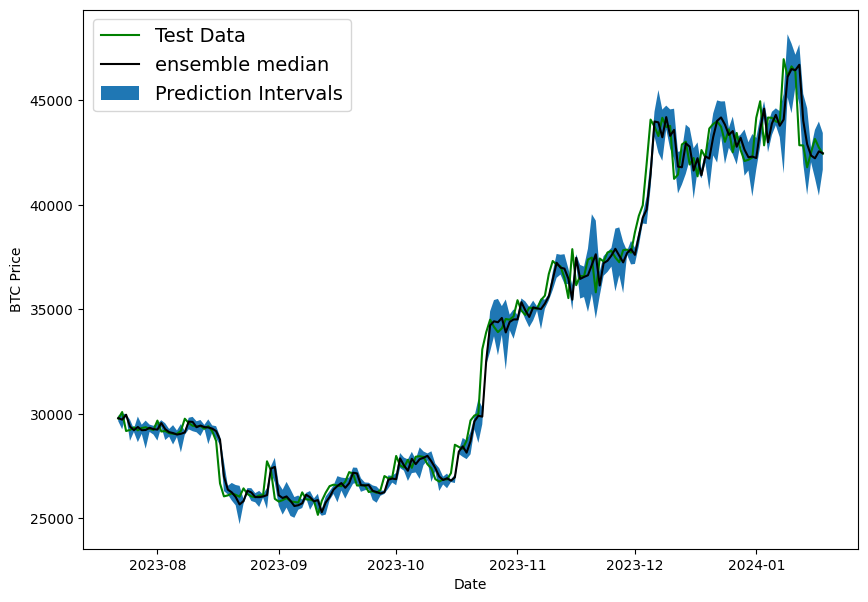

In [113]:
# get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:] , "k-", label = "ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# to plot the upper and lower bounds
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals")
plt.legend(loc="upper left", fontsize = 14);



In [114]:
# model 9: train a model with full historical data to make predictions into the future
bit_coin_prices_windowed.head()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [115]:
x_all = bit_coin_prices_windowed.dropna().drop(["Price","block_reward"], axis = 1).to_numpy()
y_all = bit_coin_prices_windowed.dropna()["Price"].to_numpy()
len(x_all),len(y_all)


(3404, 3404)

In [116]:
 feature_all_dataset = tf.data.Dataset.from_tensor_slices(x_all)
 labesl_all_dataset = tf.data.Dataset.from_tensor_slices(y_all)

 dataset_all = tf.data.Dataset.zip((feature_all_dataset,labesl_all_dataset))

 batch_size = 1024
 dataset_all = dataset_all.batch(batch_size).prefetch(tf.data.AUTOTUNE)

 dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [117]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_9")

model_9.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

In [118]:
into_future = 14
def make_future_pred(values, model, into_future,window_size = WINDOW_SIZE) -> list:
  """
  make future forecasts into_future steps after values end.

  Returns future forecasts as a list of floats.
  """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Prediction  on:\n {last_window} -> prediciton : {tf.squeeze(future_pred).numpy()}")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window =np.append(last_window, future_pred)[-WINDOW_SIZE:]


In [119]:
future_forecast = make_future_pred(y_all, model = model_9,
                                   into_future = into_future,
                                   window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 66ms/step
Prediction  on:
 [42853.167969 42842.382813 41796.269531 42511.96875  43154.945313
 42742.652344 42449.023438] -> prediciton : 42389.5
1/1 [==============================] - 0s 21ms/step
Prediction  on:
 [42842.382813 41796.269531 42511.96875  43154.945313 42742.652344
 42449.023438 42389.5     ] -> prediciton : 42239.65625
1/1 [==============================] - 0s 22ms/step
Prediction  on:
 [41796.269531 42511.96875  43154.945313 42742.652344 42449.023438
 42389.5      42239.65625 ] -> prediciton : 41943.640625
1/1 [==============================] - 0s 22ms/step
Prediction  on:
 [42511.96875  43154.945313 42742.652344 42449.023438 42389.5
 42239.65625  41943.640625] -> prediciton : 42391.24609375
1/1 [==============================] - 0s 21ms/step
Prediction  on:
 [43154.945313   42742.652344   42449.023438   42389.5
 42239.65625    41943.640625   42391.24609375] -> prediciton : 42553.90234375
1/1 [==============================] - 0

In [120]:
bit_coin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-01-14,41796.269531,6.25,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469,46970.503906,43943.097656
2024-01-15,42511.968750,6.25,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469,46970.503906
2024-01-16,43154.945313,6.25,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469
2024-01-17,42742.652344,6.25,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344
2024-01-18,42449.023438,6.25,42742.652344,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938


In [121]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,514.060913,6.252576e+05,790.732300,1.848709,1.000461
model_1_dense_w7_h1,518.790039,6.317019e+05,794.796753,1.875565,1.017621
model_2_dense_w30_h1,544.217407,6.610577e+05,813.054565,1.978687,1.074707
model_3_dense_w30_h7,1110.269165,2.836702e+06,1280.352051,4.099087,2.191746
model_4_CONV1D,516.433228,6.272638e+05,791.999817,1.866657,1.012998
model_5_LSTM,541.166260,6.718834e+05,819.684937,1.963967,1.061512
model_6_multivariate,513.198608,6.251385e+05,790.656982,1.851729,1.006653
model_8_NBEATs,511.044830,6.230959e+05,789.364258,1.841728,1.002428
model_9_ensemble,542.438965,6.722718e+05,819.921814,1.954282,1.064009


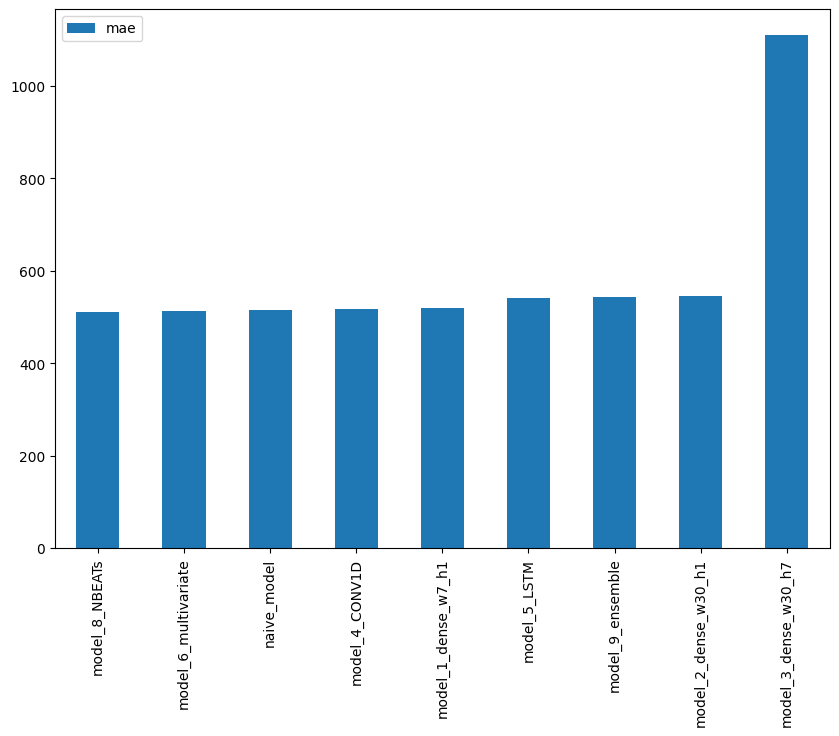

In [122]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");